In [119]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

import lacroix

In [81]:
serr_seq = pd.read_csv('serrano_seq_level.csv')
waltz_seq = pd.read_csv('waltz_seq_level.csv')
waltz_res = pd.read_csv('waltz_res_level.csv')
amypro_res = pd.read_csv('amypro_res_level.csv')

waltz_res['Aggregation label'] = waltz_res['Aggregation label'].replace('False', 'Non-amyloid')
waltz_res['Aggregation label'] = waltz_res['Aggregation label'].replace('True', 'Amyloid')
waltz_res

,Unnamed: 0,predictions_1,pad_mask_1,labels_1,Aggregation label
0,0,3.987937e-03,0,0,Padding
1,1,1.107143e-03,0,0,Padding
2,2,6.287020e-07,1,0,Non-amyloid
3,3,7.559297e-06,1,0,Non-amyloid
4,4,4.865943e-05,1,0,Non-amyloid
...,...,...,...,...,...
189329,189329,1.941647e-01,0,0,Padding
189330,189330,3.355391e-01,0,0,Padding
189331,189331,4.350974e-02,0,0,Padding
189332,189332,5.954089e-02,0,0,Padding


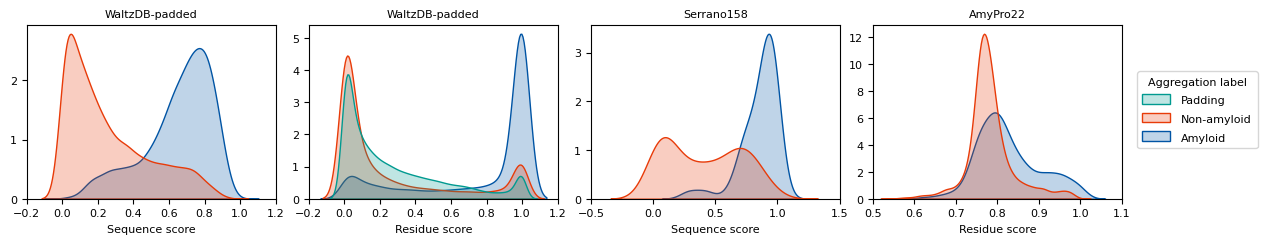

In [195]:
fig = plt.figure(figsize=(16, 2.25))  

gs = gridspec.GridSpec(1, 5, width_ratios=[1,1,1,1,0.45])

ax2 = fig.add_subplot(gs[0, 0]) 
ax1 = fig.add_subplot(gs[0, 1])  

ax1 = sns.kdeplot(waltz_res, x="predictions_1", hue="Aggregation label", fill=True, common_norm=False, palette=[lacroix.colorList('Lemon')[3],lacroix.colorList('PeachPear')[0],lacroix.colorList('Lime')[4]], ax=ax1, legend=True)
sns.move_legend(ax1, 'lower left', bbox_to_anchor=(3.3, .25))
plt.setp(ax1.get_legend().get_texts(), fontsize='8')
plt.setp(ax1.get_legend().get_title(), fontsize='8')
ax1.set_title('WaltzDB-padded', fontsize=8)
ax1.set_xlabel('Residue score', fontsize=8)
ax1.set_ylabel('')
ax1.tick_params(axis='both', labelsize=8)
ax2.set_yticks(np.arange(-1,4,1))
ax1.set_xticks(np.arange(-1.4,1.4,0.2))
ax1.set_xlim([-0.2,1.2])

sns.kdeplot(waltz_seq, x="predictions_probability", hue="Aggregation label", fill=True, common_norm=False, palette=[lacroix.colorList('PeachPear')[0],lacroix.colorList('Lime')[4]], ax=ax2, legend=False)
ax2.set_title('WaltzDB-padded', fontsize=8)
ax2.set_xlabel('Sequence score', fontsize=8)
ax2.set_ylabel('')
ax2.tick_params(axis='both', labelsize=8)
ax2.set_xticks(np.arange(-1.4,1.4,0.2))
ax2.set_xlim([-0.2,1.2])

ax3 = fig.add_subplot(gs[0, 2])  
ax4 = fig.add_subplot(gs[0, 3])  
ax5 = fig.add_subplot(gs[0, 4])  
ax5.set_visible(False)

sns.kdeplot(serr_seq, x="probabilities_average", hue="Aggregation label", fill=True, common_norm=False, palette=[lacroix.colorList('PeachPear')[0],lacroix.colorList('Lime')[4]], ax=ax3, legend=False)
ax3.set_title('Serrano158', fontsize=8)
ax3.set_xlabel('Sequence score', fontsize=8)
ax3.set_ylabel('')
ax3.tick_params(axis='both', labelsize=8)
ax3.set_xticks(np.arange(-1,2,0.5))
ax3.set_xlim([-0.5,1.5])

sns.kdeplot(amypro_res, x="predictions_average", hue="Aggregation label", fill=True, common_norm=False, palette=[lacroix.colorList('PeachPear')[0],lacroix.colorList('Lime')[4]], ax=ax4, legend=False)
ax4.set_title('AmyPro22', fontsize=8)
ax4.set_xlabel('Residue score', fontsize=8)
ax4.set_ylabel('')
ax4.tick_params(axis='both', labelsize=8)
ax4.set_xticks(np.arange(0.5,1.1,0.1))
ax4.set_xlim([0.5,1.1])

plt.subplots_adjust(wspace=0.15)
#plt.tight_layout()
plt.show()
#fig.savefig('fig4_distributions.png', dpi=600, bbox_inches='tight')
#fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_distributions.png', dpi=600, bbox_inches='tight')
#fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_distributions.pdf', dpi=600, bbox_inches='tight')